In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)
heights = np.random.normal(loc=170, scale=10, size=100)

In [6]:
!pip install scipy

                                              0.0/38.6 MB ? eta -:--:--
                                              0.0/38.6 MB ? eta -:--:--
                                             0.0/38.6 MB 653.6 kB/s eta 0:00:59
                                             0.1/38.6 MB 777.7 kB/s eta 0:00:50
                                             0.1/38.6 MB 798.9 kB/s eta 0:00:49
                                             0.2/38.6 MB 833.5 kB/s eta 0:00:47
                                             0.2/38.6 MB 888.4 kB/s eta 0:00:44
                                             0.2/38.6 MB 798.9 kB/s eta 0:00:48
                                             0.3/38.6 MB 850.6 kB/s eta 0:00:46
                                             0.3/38.6 MB 833.5 kB/s eta 0:00:46
                                             0.3/38.6 MB 838.1 kB/s eta 0:00:46
                                             0.4/38.6 MB 857.1 kB/s eta 0:00:45
                                             0.4/38.6 MB


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


RuntimeError: Cumulative KDE evaluation requires scipy

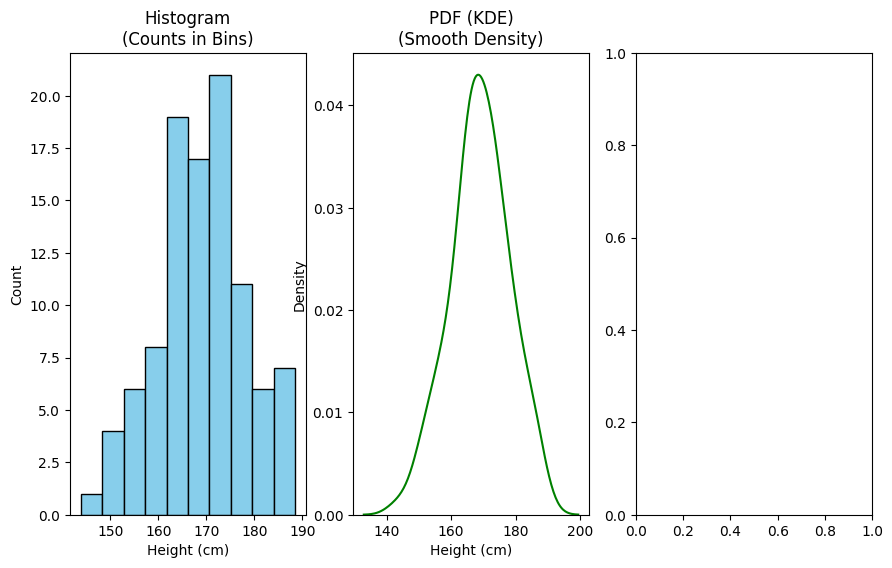

In [5]:
heights = heights.astype(float)
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 4, 1)
plt.hist(heights, bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram\n(Counts in Bins)")
plt.xlabel("Height (cm)")
plt.ylabel("Count")

# PDF using KDE (no fill)
plt.subplot(1, 4, 2)
sns.kdeplot(heights, color='green')
plt.title("PDF (KDE)\n(Smooth Density)")
plt.xlabel("Height (cm)")

# CDF (no fill)
plt.subplot(1, 4, 3)
sns.kdeplot(heights, cumulative=True, color='orange')
plt.title("CDF\n(Cumulative Probability)")
plt.xlabel("Height (cm)")

# Combined view for Histogram + KDE
plt.subplot(1, 4, 4)
sns.histplot(heights, bins=10, stat="density", kde=True, color="purple", edgecolor='black')
plt.title("Histogram + KDE")
plt.xlabel("Height (cm)")

plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(0)
scores = np.random.normal(loc=70, scale=15, size=100)
scores = np.clip(scores, 0, 100)  # restrict to 0-100

# Show basic stats
score_summary = pd.Series(scores).describe()
score_summary

In [ ]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 4, 1)
plt.hist(scores, bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram\n(Score Distribution)")
plt.xlabel("Exam Score")
plt.ylabel("Student Count")

# PDF using KDE
plt.subplot(1, 4, 2)
sns.kdeplot(scores, color='green')
plt.title("PDF (KDE)\n(Score Density)")
plt.xlabel("Exam Score")

# CDF
plt.subplot(1, 4, 3)
sns.kdeplot(scores, cumulative=True, color='orange')
plt.title("CDF\n(Cumulative % of Students)")
plt.xlabel("Exam Score")

# Histogram + KDE
plt.subplot(1, 4, 4)
sns.histplot(scores, bins=10, stat="density", kde=True, color="purple", edgecolor='black')
plt.title("Histogram + KDE")
plt.xlabel("Exam Score")

plt.tight_layout()
plt.show()

In [ ]:
# P(60 ≤ score ≤ 80) = CDF(80) - CDF(60)

In [ ]:
from scipy.stats import gaussian_kde
from scipy.integrate import quad

# Estimate PDF using KDE
kde = gaussian_kde(scores)

# Define range
lower = 60
upper = 80

# Integrate the PDF between 60 and 80
prob_between_60_80, _ = quad(kde, lower, upper)

# Convert probability to count (out of 100 students)
count_estimate = prob_between_60_80 * len(scores)

count_estimate, prob_between_60_80
